In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Select useful features
data = df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]].copy()

# Fill missing Age with median (robust to outliers)
data["Age"] = data["Age"].fillna(data["Age"].median())

# Map Sex to numeric: male=1, female=0
data["Sex"] = data["Sex"].map({"male": 1, "female": 0})

data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [3]:
# Define target and features
y = data["Survived"].values
X = data.drop(columns=["Survived"]).values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape of X:", X_scaled.shape)
print("Shape of y:", y.shape)


Shape of X: (891, 6)
Shape of y: (891,)


In [4]:
n_samples = X_scaled.shape[0]

# Random shuffle
np.random.seed(0)
perm = np.random.permutation(n_samples)

# 80/20 split
split = int(0.8 * n_samples)
train_idx = perm[:split]
test_idx = perm[split:]

X_train = X_scaled[train_idx]
y_train = y[train_idx]
X_test = X_scaled[test_idx]
y_test = y[test_idx]

print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])


Training samples: 712
Test samples: 179


In [5]:
# Initialize model with enough iterations
model = LogisticRegression(max_iter=3000)

# Train model
model.fit(X_train, y_train)

# Learned weights (intercept + coefficients)
weights = np.hstack([model.intercept_, model.coef_.flatten()])
print("Learned weights (scikit):", weights)


Learned weights (scikit): [-0.72364352 -0.81347299 -1.23345352 -0.47364638 -0.3968811  -0.06909911
  0.18140198]


In [6]:
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.7988826815642458


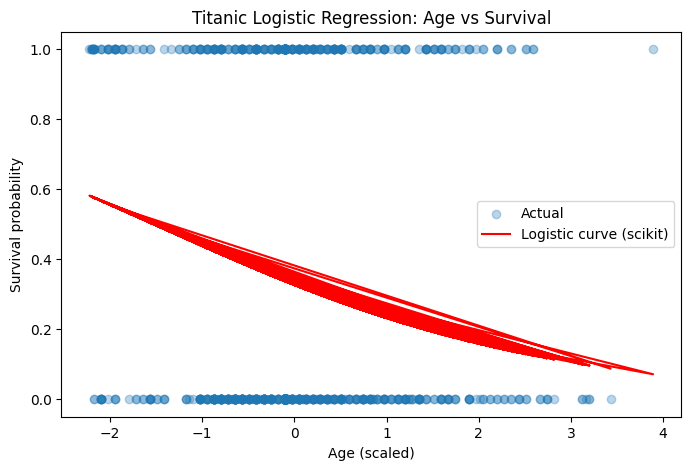

In [7]:
# Choose Age feature (index 2 in X_scaled)
feature_idx = 2  
X_age = X_scaled[:, feature_idx]

# Compute predicted probabilities for survival
z_age = model.intercept_[0] + model.coef_[0, feature_idx] * X_age
probs_age = 1 / (1 + np.exp(-z_age))

plt.figure(figsize=(8,5))
plt.scatter(X_age, y, alpha=0.3, label="Actual")
plt.plot(X_age, probs_age, color="red", label="Logistic curve (scikit)")
plt.xlabel("Age (scaled)")
plt.ylabel("Survival probability")
plt.title("Titanic Logistic Regression: Age vs Survival")
plt.legend()
plt.savefig("logistic_curve.png")
plt.show()


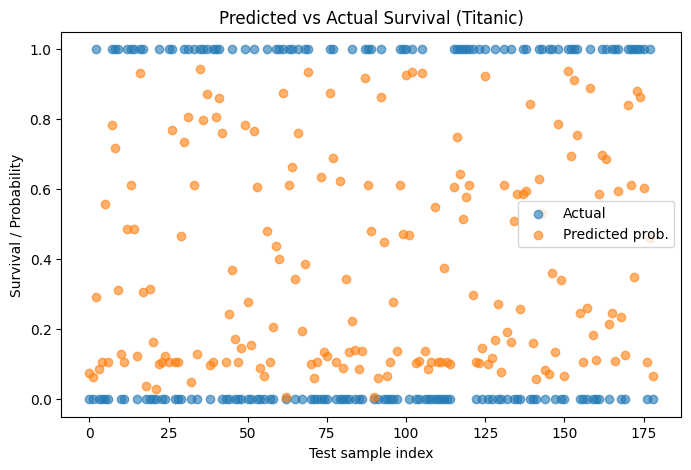

In [8]:
# Get predicted probabilities for test data
probs_test = model.predict_proba(X_test)[:, 1]

plt.figure(figsize=(8,5))
plt.scatter(range(len(y_test)), y_test, label="Actual", alpha=0.6)
plt.scatter(range(len(y_test)), probs_test, label="Predicted prob.", alpha=0.6)
plt.xlabel("Test sample index")
plt.ylabel("Survival / Probability")
plt.title("Predicted vs Actual Survival (Titanic)")
plt.legend()
plt.savefig("predicted_vs_actual.png")
plt.show()


In [9]:
# Feature names
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]

# Intercept and coefficients
intercept = model.intercept_[0]
coefs = model.coef_[0]

# Build equation string
equation = f"p(x) = 1 / (1 + exp(-({intercept:.3f}"
for feat, coef in zip(features, coefs):
    sign = "+" if coef >= 0 else "-"
    equation += f" {sign} {abs(coef):.3f}*{feat}"
equation += ")))"

print("Final Logistic Regression Equation:\n")
print(equation)


Final Logistic Regression Equation:

p(x) = 1 / (1 + exp(-(-0.724 - 0.813*Pclass - 1.233*Sex - 0.474*Age - 0.397*SibSp - 0.069*Parch + 0.181*Fare)))
